# Image Compression using KMeans

## Problem Statement

With the rapid growth of digital media, storage and bandwidth requirements for images have increased significantly. Traditional image compression techniques (such as JPEG/PNG algorithms) are widely used, but exploring machine learning-based approaches provides both educational and practical value.

The problem addressed in this project is:
**How can we reduce the storage size of an image by limiting its color space using unsupervised learning, while maintaining acceptable visual quality?**

This project applies K-Means clustering on the pixel values of an image to reduce the number of unique colors. By grouping similar colors into clusters and replacing them with their centroid values, the image is reconstructed with fewer colors — effectively compressing it while retaining most of its visual appearance.

##  Approach  

1. **Image as Data**  
   - An image is made up of pixels.  
   - Each pixel has RGB (Red, Green, Blue) values.  
   - Many colors are very similar, but all are stored individually, increasing file size.  

2. **KMeans Clustering**  
   - Treat each pixel (its RGB values) as a data point in 3D space.  
   - Apply **KMeans clustering** to group pixels into *k* clusters.  
   - Each cluster is represented by its **centroid** (average color).  

3. **Reconstructing the Image**  
   - Replace each pixel’s color with the centroid color of its cluster.  
   - The compressed image now contains only *k* distinct colors.  

4. **Compression Effect**  
   - Instead of storing all original colors, we store:  
     - The *k* centroid colors.  
     - A cluster label for each pixel.  
   - This reduces storage size while preserving visual appearance.  

---

##  Expected Outcome  

- Side-by-side visualization: **original image vs compressed image**.  
- **File size comparison** before and after compression.  
- Demonstration of how changing *k* affects quality and compression.  

---

 This approach shows how machine learning (unsupervised learning) can be applied to a **real-world problem** in an intuitive and visual way.
    Let's Roll In It


### Import Required Libraries
 - Numpy : For Converting Image Into Array And Resizing
 - Matplot For Visualizing
 - Shuffle For Making Training Data

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from PIL import Image

### Resizing Image
 The Original Image Have **High Resolution** , We Resize The Image To (256,256) For **Faster Computation**
 

Text(0.5, 1.0, 'Image With Resizing')

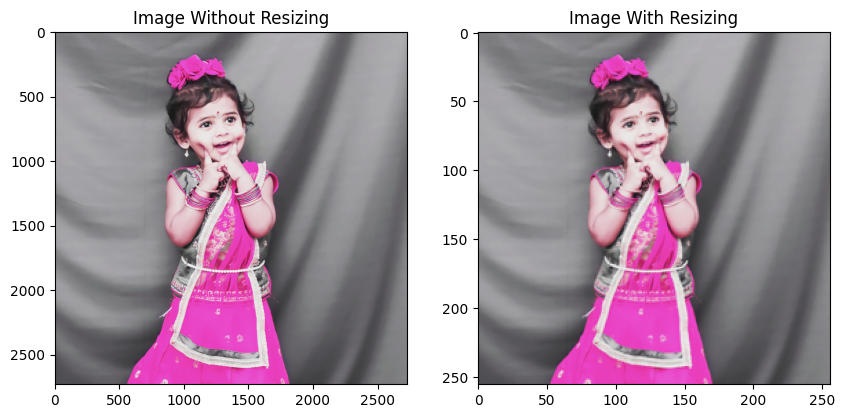

In [10]:
IMAGE = "pilli.jpg"
image1 = Image.open(IMAGE)
fig , ax = plt.subplots(1,2,figsize = (10,8))
image = image1.resize((256,256))
ax[0].imshow(image1)
ax[0].set_title("Image Without Resizing")
ax[1].imshow(image)
ax[1].set_title("Image With Resizing")

#### From Above 2 Images We can Easily Tell That ; Resized Image Loss Some Of Pixels

### Converting In Array
 - We Can't Work With Direct Image We Have To Convert Into Array.
 - Divided By 255 So We Get Array Of [0,1].

In [11]:
image_arr = np.array(image , dtype=np.float64) / 255

In [12]:
w, h, d = image_arr.shape

In [13]:
image_reshaped = np.reshape(image_arr, (w * h, d))

In [15]:
print(f"Image Shape:{image_arr.shape}\nReshaped Image Shape:{image_reshaped.shape} ")

Image Shape:(256, 256, 3)
Reshaped Image Shape:(65536, 3) 


### Shuffling Array To Train
 - If We Train KMeans On Original Image ; It Might Get **OverFit**.

In [19]:
train = shuffle(image_reshaped , random_state = 42)[:10000]
train.shape

(10000, 3)

### Let's Train With K Value 3 
 - K = 3 ; coz We Have 3 Colors (RGB).

In [20]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(train)

KMeans(n_clusters=3)

In [21]:
labels = kmeans.predict(image_reshaped)

### Take Centers Of Clusters

In [23]:
centroids = kmeans.cluster_centers_
compressed_array = centroids[labels]

### Reshaping to Form Image

In [24]:
compressed_image = np.reshape(compressed_array, (w,h,d))
compressed_image.shape

(256, 256, 3)

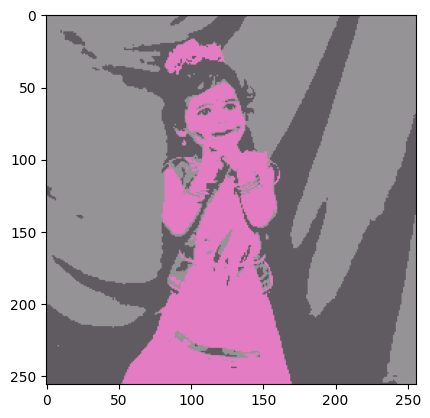

In [25]:
plt.imshow(compressed_image)

### Clearly See that It Not Resembleling 
 - Not Meeting To Our Requirement

Text(0, 0.5, 'Green Channel')

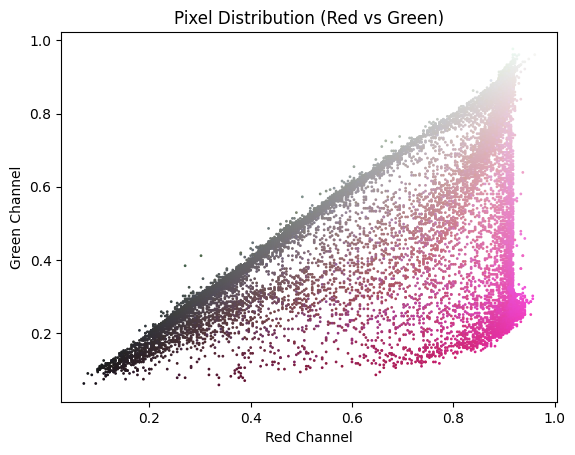

In [84]:
plt.scatter(image_reshaped[:,0], image_reshaped[:,1], c=image_reshaped, s=1)  
plt.title("Pixel Distribution (Red vs Green)")
plt.xlabel("Red Channel")
plt.ylabel("Green Channel")

Text(0.5, 0, 'Green Channel')

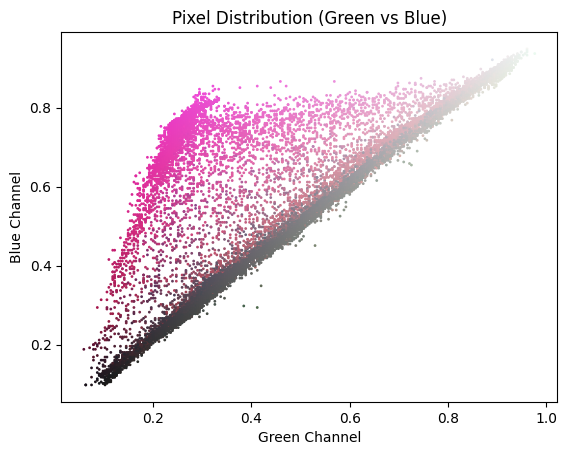

In [85]:
plt.scatter(image_reshaped[:,1], image_reshaped[:,2], c=image_reshaped, s=1)
plt.title("Pixel Distribution (Green vs Blue)")
plt.ylabel("Blue Channel")
plt.xlabel("Green Channel")

Text(0.5, 0, 'Red Channel')

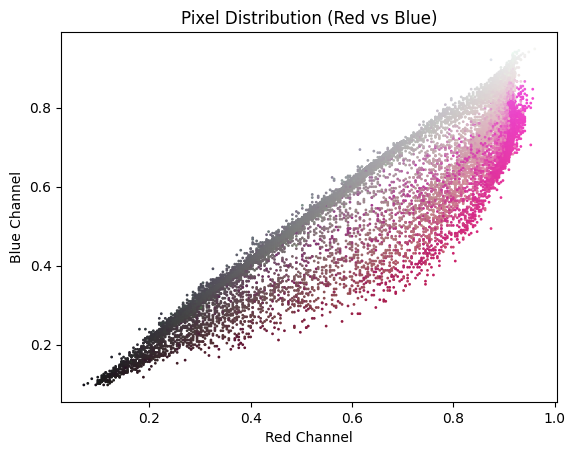

In [86]:
plt.scatter(image_reshaped[:,0], image_reshaped[:,2], c=image_reshaped, s=1)
plt.title("Pixel Distribution (Red vs Blue)")
plt.ylabel("Blue Channel")
plt.xlabel("Red Channel")

### Let's Found Out The Best K Value By Elbow's Method

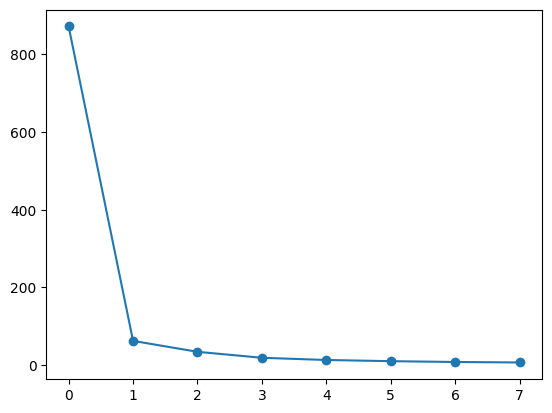

In [41]:
inertia = []
for k in range(1,38,5):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train)
    inertia.append(kmeans.inertia_)
plt.plot(inertia, marker = 'o')

### By Elbow's Method We Got Best K Value Is 1 .

### Let's Plot Image For K=1

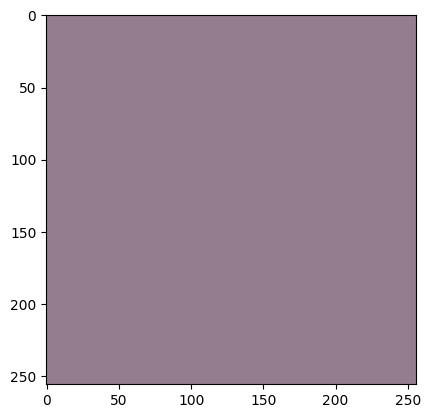

In [45]:
kmeans = KMeans(n_clusters =1)
kmeans.fit(train)
label = kmeans.predict(image_reshaped)
new_image = kmeans.cluster_centers_[label]
new_image = np.reshape(new_image, (w,h,d))
plt.imshow(new_image)

#### We Can't See Any Other Pixels So Elbow's Method Fails.

### We Have To Find Out Ourselves .

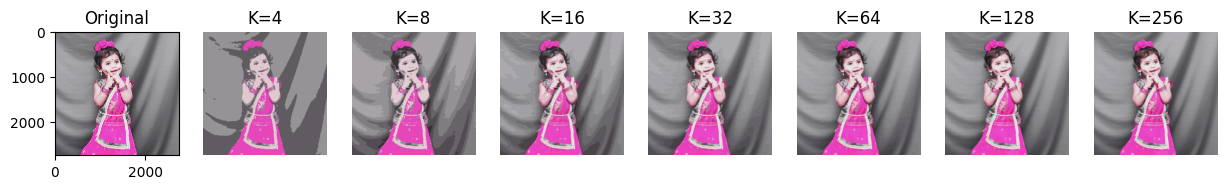

In [64]:
def img(k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train)
    labels = kmeans.predict(image_reshaped)
    centroids = kmeans.cluster_centers_
    new_image = centroids[labels]
    new_image = np.reshape(new_image ,(w,h,d))
    return new_image

k_values = [4,8,16,32,64,128,256]
plt.figure(figsize=(15,5))

plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(image1)
plt.title("Original")


for i ,k in enumerate(k_values, start =2):
    function_image = img(k)
    plt.subplot(1, len(k_values) + 1, i)
    plt.imshow(function_image)
    plt.title(f"K={k}")
    plt.axis("off")

    
    

### Here We Can See The Results 
### Image With K = 256 Is More Look Alike Original

In [72]:
from skimage import img_as_ubyte ,io
import os

compressed_image = img(256)
compressed_image = img_as_ubyte(compressed_image)
io.imsave("Compressed_image.jpg",compressed_image)

cimg="Compressed_image.jpg"

Osize = os.path.getsize(IMAGE) / 1024
Csize = os.path.getsize(cimg) / 1024

print(f"Original Size : {Osize:.2f} KB\nCompressed Size : {Csize:.2f} KB ")

Original Size : 949.69 KB
Compressed Size : 8.80 KB 


Text(0.5, 1.0, 'Compressed Image 8.80 KB')

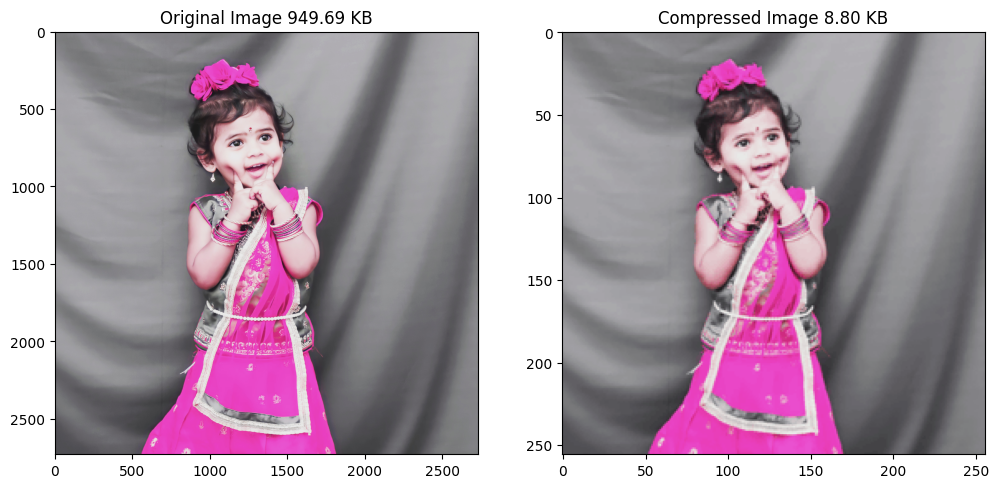

In [83]:
fig, ax = plt.subplots(1,2,figsize = (12,8))
ax[0].imshow(image1)
ax[0].set_title(f"Original Image {Osize:.2f} KB")
ax[1].imshow(compressed_image)
ax[1].set_title(f"Compressed Image {Csize:.2f} KB")

## Conclusion
- KMeans clustering can effectively reduce image size by limiting colors.  
- Compression ratio depends on the number of clusters (k).  
- Visual quality is preserved well for higher values of k.  
- This method shows how unsupervised ML can be applied to real-world problems.
